## Importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import NearestNeighbors
import math
import seaborn as sn

In [2]:
import random
from scipy import ndarray

In [3]:
%config InlineBackend.figure_format = 'svg'

In [4]:
palette = ['paleturquoise','c']

## Import dataset

In [5]:
from collections import Counter
from imblearn.datasets import fetch_datasets
data = fetch_datasets()['isolet']

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [6]:
data.data.shape

(7797, 617)

In [7]:
len(data.data)

7797

In [8]:
def unison_shuffled_copies(a, b):
    np.random.seed(2)##change seed 1,2,3,4,5
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [9]:
data.data,data.target=unison_shuffled_copies(data.data, data.target)

## Initializing Results list

## Creating label and feature matrices

In [10]:
labels=data.target
print(np.unique(labels, return_counts = 1))

(array([-1,  1], dtype=int64), array([7197,  600], dtype=int64))


In [11]:
features=data.data
features.shape

(7797, 617)

In [12]:
n_feat=len(features[1])

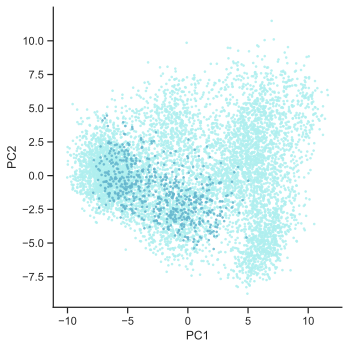

In [13]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
pc = pca.fit_transform(features)
result_baseline = pd.DataFrame(data = pc , 
        columns = ['PC1','PC2'])
result_baseline['Cluster'] = labels


sns.set(font_scale=1.2)
sns.set(rc={'figure.figsize':(12,10)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})


g_baseline=sns.lmplot( x="PC1", y="PC2",
  data=result_baseline, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=False,
  scatter_kws={"s": 3}, palette= sns.color_palette(palette) ) # specify the point size


plt.grid(False)
plt.show()

## Dividing data into training and testing datasets

In [14]:
label_1=np.where(labels == 1)[0]
label_1=list(label_1)
len(label_1)

600

In [15]:
features_1=features[label_1]
features_1=np.take(features_1,np.random.permutation(features_1.shape[0]),axis=0,out=features_1)

In [16]:
label_0=np.where(labels == -1)[0]
label_0=list(label_0)
len(label_0)

7197

In [17]:
features_0=features[label_0]
features_0=np.take(features_0,np.random.permutation(features_0.shape[0]),axis=0,out=features_0)

In [18]:
a=len(features_1)//10
b=len(features_0)//10

In [19]:
fold_1_min=features_1[0:a]
fold_1_maj=features_0[0:b]
fold_1_tst=np.concatenate((fold_1_min,fold_1_maj))
lab_1_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [20]:
fold_2_min=features_1[a:2*a]
fold_2_maj=features_0[b:2*b]
fold_2_tst=np.concatenate((fold_2_min,fold_2_maj))
lab_2_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [21]:
fold_3_min=features_1[2*a:3*a]
fold_3_maj=features_0[2*b:3*b]
fold_3_tst=np.concatenate((fold_3_min,fold_3_maj))
lab_3_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [22]:
fold_4_min=features_1[3*a:4*a]
fold_4_maj=features_0[3*b:4*b]
fold_4_tst=np.concatenate((fold_4_min,fold_4_maj))
lab_4_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [23]:
fold_5_min=features_1[4*a:5*a]
fold_5_maj=features_0[4*b:5*b]
fold_5_tst=np.concatenate((fold_5_min,fold_5_maj))
lab_5_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [24]:
fold_6_min=features_1[5*a:6*a]
fold_6_maj=features_0[5*b:6*b]
fold_6_tst=np.concatenate((fold_6_min,fold_6_maj))
lab_6_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [25]:
fold_7_min=features_1[6*a:7*a]
fold_7_maj=features_0[6*b:7*b]
fold_7_tst=np.concatenate((fold_7_min,fold_7_maj))
lab_7_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [26]:
fold_8_min=features_1[7*a:8*a]
fold_8_maj=features_0[7*b:8*b]
fold_8_tst=np.concatenate((fold_8_min,fold_8_maj))
lab_8_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [27]:
fold_9_min=features_1[8*a:9*a]
fold_9_maj=features_0[8*b:9*b]
fold_9_tst=np.concatenate((fold_9_min,fold_9_maj))
lab_9_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [28]:
fold_10_min=features_1[9*a:]
fold_10_maj=features_0[9*b:]
fold_10_tst=np.concatenate((fold_10_min,fold_10_maj))
lab_10_tst=np.concatenate((np.zeros(len(fold_10_min))+1, np.zeros(len(fold_10_maj))))

In [29]:
fold_1_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [30]:
lab_1_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [31]:
fold_2_trn=np.concatenate((fold_1_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_1_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [32]:
lab_2_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [33]:
fold_3_trn=np.concatenate((fold_2_min,fold_1_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_1_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [34]:
lab_3_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [35]:
fold_4_trn=np.concatenate((fold_2_min,fold_3_min,fold_1_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_1_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [36]:
lab_4_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [37]:
fold_5_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_1_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_1_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [38]:
lab_5_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [39]:
fold_6_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_1_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_1_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [40]:
lab_6_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [41]:
fold_7_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_1_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_1_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [42]:
lab_7_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [43]:
fold_8_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_1_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_1_maj,fold_9_maj,fold_10_maj))

In [44]:
lab_8_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [45]:
fold_9_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_1_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_1_maj,fold_10_maj))

In [46]:
lab_9_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [47]:
fold_10_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_1_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_1_maj))

In [48]:
lab_10_trn=np.concatenate((np.zeros(9*a)+1,np.zeros(9*b)))


In [49]:
training_folds_feats=[fold_1_trn,fold_2_trn,fold_3_trn,fold_4_trn,fold_5_trn,fold_6_trn,fold_7_trn,fold_8_trn,fold_9_trn,fold_10_trn]

In [50]:
testing_folds_feats=[fold_1_tst,fold_2_tst,fold_3_tst,fold_4_tst,fold_5_tst,fold_6_tst,fold_7_tst,fold_8_tst,fold_9_tst,fold_10_tst]

In [51]:
training_folds_labels=[lab_1_trn,lab_2_trn,lab_3_trn,lab_4_trn,lab_5_trn,lab_6_trn,lab_7_trn,lab_8_trn,lab_9_trn,lab_10_trn]

In [52]:
testing_folds_labels=[lab_1_tst,lab_2_tst,lab_3_tst,lab_4_tst,lab_5_tst,lab_6_tst,lab_7_tst,lab_8_tst,lab_9_tst,lab_10_tst]

In [53]:
def lr(X_train,y_train,X_test,y_test):
    from sklearn import metrics
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', class_weight={0: 1, 1: 1})
    logreg.fit(X_train, y_train)
    y_pred= logreg.predict(X_test)
    y_proba=logreg.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    aps=average_precision_score(y_test,y_proba)
    print('balanced accuracy_LR:', bal_acc)
    print('f1 score_LR:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_LR',con_mat)
    return(f1, bal_acc, aps, con_mat)

In [54]:
def svm(X_train,y_train,X_test,y_test):
    from sklearn import preprocessing
    from sklearn import metrics
    from sklearn import svm
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    X_train = preprocessing.scale(X_train)
    X_test = preprocessing.scale(X_test)
    svm= svm.SVC(kernel='linear', decision_function_shape='ovo', class_weight={0: 1., 1: 1.},probability=True)
    svm.fit(X_train, y_train)
    y_pred= svm.predict(X_test)
    y_proba=svm.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    aps=average_precision_score(y_test,y_proba)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    print('balanced accuracy_SVM:', bal_acc)
    print('f1 score_SVM:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_SVM',con_mat)
    return( f1, bal_acc , aps, con_mat)

In [55]:
def knn(X_train,y_train,X_test,y_test):
    from sklearn import metrics
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(X_train, y_train)
    y_pred= knn.predict(X_test)
    y_proba=knn.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    aps=average_precision_score(y_test,y_proba)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    print('balanced accuracy_KNN:', bal_acc)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    print('f1 score_KNN:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_KNN',con_mat)
    return(f1, bal_acc, aps, con_mat)

In [56]:
def Neb_grps(data,near_neb):
    nbrs = NearestNeighbors(n_neighbors=near_neb, algorithm='ball_tree').fit(data)
    distances, indices = nbrs.kneighbors(data)
    neb_class=[]
    for i in (indices):
        neb_class.append(i)
    return(np.asarray(neb_class)) 

def LoRAS(data,num_samples,shadow,sigma,num_RACOS,num_afcomb):
    np.random.seed(42)
    data_shadow=([])
    for i in range (num_samples):
        c=0
        while c<shadow:
            data_shadow.append(data[i]+np.random.normal(0,sigma))
            c=c+1
    data_shadow==np.asarray(data_shadow)
    data_shadow_lc=([])
    for i in range(num_RACOS):
        idx = np.random.randint(shadow*num_samples, size=num_afcomb)
        w=np.random.randint(100, size=len(idx))
        aff_w=np.asarray(w/sum(w))
        data_tsl=np.array(data_shadow)[idx,:]
        data_tsl_=np.dot(aff_w, data_tsl)
        data_shadow_lc.append(data_tsl_)
    return(np.asarray(data_shadow_lc))   

def LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb):
    RACOS_set=[]
    for i in range (len(nb_list)):
        RACOS_i= LoRAS(features_1_trn[nb_list[i]],num_samples,shadow,sigma,num_RACOS,num_afcomb)
        RACOS_set.append(RACOS_i)
    LoRAS_set=np.asarray(RACOS_set)
    LoRAS_1=np.reshape(LoRAS_set,(len(features_1_trn)*num_RACOS,n_feat))
    return(np.concatenate((LoRAS_1,features_1_trn)))

In [57]:
import smote_variants as sv
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE 

In [58]:
def OVS(training_data,training_labels,neb):
    
    smote_mot2ld = sv.MOT2LD(random_state=62, k = neb)
    SMOTE_feat_mot2ld, SMOTE_labels_mot2ld = smote_mot2ld.sample(training_data, training_labels)
    
    smote_dbsmote = sv.DBSMOTE(random_state=62, )
    SMOTE_feat_dbsmote, SMOTE_labels_dbsmote = smote_dbsmote.sample(training_data, training_labels)
    
    smote_cure = sv.CURE_SMOTE(random_state=62, )
    SMOTE_feat_cure, SMOTE_labels_cure = smote_cure.sample(training_data, training_labels)
    
    smote_SOMO = sv.SOMO(random_state=62)
    SMOTE_feat_SOMO, SMOTE_labels_SOMO = smote_SOMO.sample(training_data, training_labels)
    
    sm = SMOTE(random_state=62, k_neighbors=neb, sampling_strategy=1)
    SMOTE_feat, SMOTE_labels = sm.fit_resample(training_data,training_labels)
    
    
    return(SMOTE_feat, SMOTE_labels, SMOTE_feat_mot2ld, SMOTE_labels_mot2ld, SMOTE_feat_dbsmote, SMOTE_labels_dbsmote,\
          SMOTE_feat_cure, SMOTE_labels_cure, SMOTE_feat_SOMO, SMOTE_labels_SOMO)

In [59]:
LR=[]
LR_SM=[]
LR_MOT2TLD=[]
LR_DBSMOTE=[]
LR_CURE=[]
LR_SOMO=[]



i=0
while i<10:
    SMOTE_feat, SMOTE_labels, SMOTE_feat_mot2ld, SMOTE_labels_mot2ld, SMOTE_feat_dbsmote, SMOTE_labels_dbsmote, SMOTE_feat_cure, SMOTE_labels_cure, SMOTE_feat_SOMO, SMOTE_labels_SOMO=OVS(training_folds_feats[i],training_folds_labels[i],30)
    
    f1_lr, bal_acc_lr, aps_lr, mat_lr=lr(training_folds_feats[i],training_folds_labels[i],testing_folds_feats[i],testing_folds_labels[i])
    LR.append([f1_lr, aps_lr, bal_acc_lr])
    
    
    f1_lr_SMOTE,bal_acc_lr_SMOTE, aps_lr_SMOTE, mat_lr_SMOTE=lr(SMOTE_feat,SMOTE_labels,testing_folds_feats[i],testing_folds_labels[i])
    LR_SM.append([f1_lr_SMOTE, bal_acc_lr_SMOTE, aps_lr_SMOTE])
    
        
    f1_lr_SMOTE_mot2ld,bal_acc_lr_SMOTE_mot2ld, aps_lr_SMOTE_mot2ld, mat_lr_SMOTE_mot2ld=lr(SMOTE_feat_mot2ld,SMOTE_labels_mot2ld,testing_folds_feats[i],testing_folds_labels[i])
    LR_MOT2TLD.append([f1_lr_SMOTE_mot2ld,bal_acc_lr_SMOTE_mot2ld, aps_lr_SMOTE_mot2ld])
    
    
    f1_lr_SMOTE_dbsmote,bal_acc_lr_SMOTE_dbsmote, aps_lr_SMOTE_dbsmote, mat_lr_SMOTE_dbsmote=lr(SMOTE_feat_dbsmote,SMOTE_labels_dbsmote,testing_folds_feats[i],testing_folds_labels[i])
    LR_DBSMOTE.append([f1_lr_SMOTE_dbsmote,bal_acc_lr_SMOTE_dbsmote, aps_lr_SMOTE_dbsmote])
    
    
    f1_lr_SMOTE_cure,bal_acc_lr_SMOTE_cure,aps_lr_SMOTE_cure,mat_lr_SMOTE_cure=lr(SMOTE_feat_cure, SMOTE_labels_cure,testing_folds_feats[i],testing_folds_labels[i])
    LR_CURE.append([f1_lr_SMOTE_cure,bal_acc_lr_SMOTE_cure,aps_lr_SMOTE_cure])
    
    
    f1_lr_SMOTE_SOMO,bal_acc_lr_SMOTE_SOMO,aps_lr_SMOTE_SOMO,mat_lr_SMOTE_SOMO=lr(SMOTE_feat_SOMO, SMOTE_labels_SOMO,testing_folds_feats[i],testing_folds_labels[i])
    LR_SOMO.append([f1_lr_SMOTE_SOMO,bal_acc_lr_SMOTE_SOMO,aps_lr_SMOTE_SOMO])
    

    i=i+1

2020-11-13 12:55:42,218:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 30, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-11-13 12:55:42,223:INFO:MOT2LD: starting TSNE n: 7018 d: 617


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7018 samples in 2.059s...
[t-SNE] Computed neighbors for 7018 samples in 113.564s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7018
[t-SNE] Computed conditional probabilities for sample 2000 / 7018
[t-SNE] Computed conditional probabilities for sample 3000 / 7018
[t-SNE] Computed conditional probabilities for sample 4000 / 7018
[t-SNE] Computed conditional probabilities for sample 5000 / 7018
[t-SNE] Computed conditional probabilities for sample 6000 / 7018
[t-SNE] Computed conditional probabilities for sample 7000 / 7018
[t-SNE] Computed conditional probabilities for sample 7018 / 7018
[t-SNE] Mean sigma: 2.366680
[t-SNE] Computed conditional probabilities in 0.242s
[t-SNE] Iteration 50: error = 104.7925644, gradient norm = 0.0261459 (50 iterations in 4.007s)
[t-SNE] Iteration 100: error = 88.1829987, gradient norm = 0.0119513 (50 iterations in 3.445s)
[t-SNE] Iteration 150: error = 84.5771790, gradient norm 

2020-11-13 12:58:11,027:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 1.8995656, gradient norm = 0.0002523 (50 iterations in 3.316s)
[t-SNE] KL divergence after 500 iterations: 1.899566


2020-11-13 12:58:12,676:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 12:58:13,811:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-13 12:58:13,811:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x000002C6E3679EA8>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 12:58:15,077:INFO:DBSMOTE: Number of clusters is 0, tryi

tn, fp, fn, tp: 706 13 14 46
balanced accuracy_LR: 0.8742929995363932
f1 score_LR: 0.773109243697479
kappa: 0.7543476483572955
average_precision_score: 0.8516711442430117
confusion matrix_LR [[706  13]
 [ 14  46]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 707 12 15 45
balanced accuracy_LR: 0.8666550764951322
f1 score_LR: 0.7692307692307692
kappa: 0.7505070993914807
average_precision_score: 0.8575088244835821
confusion matrix_LR [[707  12]
 [ 15  45]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 707 12 16 44
balanced accuracy_LR: 0.8583217431617988
f1 score_LR: 0.7586206896551724
kappa: 0.7392281574291043
average_precision_score: 0.8588114527552844
confusion matrix_LR [[707  12]
 [ 16  44]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 706 13 14 46
balanced accuracy_LR: 0.8742929995363932
f1 score_LR: 0.773109243697479
kappa: 0.7543476483572955
average_precision_score: 0.8516711442430117
confusion matrix_LR [[706  13]
 [ 14  46]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 705 14 15 45
balanced accuracy_LR: 0.8652642559109875
f1 score_LR: 0.7563025210084034
kappa: 0.7361511778652433
average_precision_score: 0.8301984700453635
confusion matrix_LR [[705  14]
 [ 15  45]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-11-13 12:58:37,732:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 30, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-11-13 12:58:37,732:INFO:MOT2LD: starting TSNE n: 7018 d: 617


tn, fp, fn, tp: 706 13 14 46
balanced accuracy_LR: 0.8742929995363932
f1 score_LR: 0.773109243697479
kappa: 0.7543476483572955
average_precision_score: 0.8516711442430117
confusion matrix_LR [[706  13]
 [ 14  46]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7018 samples in 2.108s...
[t-SNE] Computed neighbors for 7018 samples in 119.377s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7018
[t-SNE] Computed conditional probabilities for sample 2000 / 7018
[t-SNE] Computed conditional probabilities for sample 3000 / 7018
[t-SNE] Computed conditional probabilities for sample 4000 / 7018
[t-SNE] Computed conditional probabilities for sample 5000 / 7018
[t-SNE] Computed conditional probabilities for sample 6000 / 7018
[t-SNE] Computed conditional probabilities for sample 7000 / 7018
[t-SNE] Computed conditional probabilities for sample 7018 / 7018
[t-SNE] Mean sigma: 2.367189
[t-SNE] Computed conditional probabilities in 0.219s
[t-SNE] Iteration 50: error = 104

2020-11-13 13:01:11,980:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 1.9017233, gradient norm = 0.0002536 (50 iterations in 3.288s)
[t-SNE] KL divergence after 500 iterations: 1.901723


2020-11-13 13:01:13,799:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:01:14,954:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-13 13:01:14,956:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x000002C6E3848C28>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:01:16,293:INFO:DBSMOTE: Number of clusters is 0, tryi

tn, fp, fn, tp: 706 13 14 46
balanced accuracy_LR: 0.8742929995363932
f1 score_LR: 0.773109243697479
kappa: 0.7543476483572955
average_precision_score: 0.8231395260379115
confusion matrix_LR [[706  13]
 [ 14  46]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 706 13 12 48
balanced accuracy_LR: 0.8909596662030599
f1 score_LR: 0.7933884297520661
kappa: 0.7759923624610359
average_precision_score: 0.8542233526763661
confusion matrix_LR [[706  13]
 [ 12  48]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 707 12 11 49
balanced accuracy_LR: 0.8999884098284654
f1 score_LR: 0.8099173553719008
kappa: 0.793912973464153
average_precision_score: 0.8683494930464639
confusion matrix_LR [[707  12]
 [ 11  49]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 706 13 14 46
balanced accuracy_LR: 0.8742929995363932
f1 score_LR: 0.773109243697479
kappa: 0.7543476483572955
average_precision_score: 0.8231395260379115
confusion matrix_LR [[706  13]
 [ 14  46]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 705 14 13 47
balanced accuracy_LR: 0.8819309225776542
f1 score_LR: 0.7768595041322314
kappa: 0.7580717514579187
average_precision_score: 0.8796969553040993
confusion matrix_LR [[705  14]
 [ 13  47]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-11-13 13:01:47,803:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 30, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-11-13 13:01:47,803:INFO:MOT2LD: starting TSNE n: 7018 d: 617


tn, fp, fn, tp: 706 13 14 46
balanced accuracy_LR: 0.8742929995363932
f1 score_LR: 0.773109243697479
kappa: 0.7543476483572955
average_precision_score: 0.8231395260379115
confusion matrix_LR [[706  13]
 [ 14  46]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7018 samples in 2.054s...
[t-SNE] Computed neighbors for 7018 samples in 118.740s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7018
[t-SNE] Computed conditional probabilities for sample 2000 / 7018
[t-SNE] Computed conditional probabilities for sample 3000 / 7018
[t-SNE] Computed conditional probabilities for sample 4000 / 7018
[t-SNE] Computed conditional probabilities for sample 5000 / 7018
[t-SNE] Computed conditional probabilities for sample 6000 / 7018
[t-SNE] Computed conditional probabilities for sample 7000 / 7018
[t-SNE] Computed conditional probabilities for sample 7018 / 7018
[t-SNE] Mean sigma: 2.367149
[t-SNE] Computed conditional probabilities in 0.267s
[t-SNE] Iteration 50: error = 104

2020-11-13 13:04:21,284:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 1.8992388, gradient norm = 0.0002553 (50 iterations in 3.224s)
[t-SNE] KL divergence after 500 iterations: 1.899239


2020-11-13 13:04:22,878:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:04:24,014:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-13 13:04:24,014:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x000002C6E37EEA48>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:04:25,315:INFO:DBSMOTE: Number of clusters is 0, tryi

tn, fp, fn, tp: 704 15 11 49
balanced accuracy_LR: 0.8979021789522486
f1 score_LR: 0.7903225806451613
kappa: 0.772211975347519
average_precision_score: 0.8812518206300186
confusion matrix_LR [[704  15]
 [ 11  49]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 703 16 10 50
balanced accuracy_LR: 0.9055401019935095
f1 score_LR: 0.7936507936507938
kappa: 0.7755391537557905
average_precision_score: 0.9137670987938641
confusion matrix_LR [[703  16]
 [ 10  50]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 704 15 8 52
balanced accuracy_LR: 0.9229021789522485
f1 score_LR: 0.8188976377952756
kappa: 0.8028781094253683
average_precision_score: 0.8942797633315649
confusion matrix_LR [[704  15]
 [  8  52]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 704 15 11 49
balanced accuracy_LR: 0.8979021789522486
f1 score_LR: 0.7903225806451613
kappa: 0.772211975347519
average_precision_score: 0.8812518206300186
confusion matrix_LR [[704  15]
 [ 11  49]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 704 15 10 50
balanced accuracy_LR: 0.9062355122855819
f1 score_LR: 0.8
kappa: 0.7825844264582752
average_precision_score: 0.8957168403233247
confusion matrix_LR [[704  15]
 [ 10  50]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-11-13 13:04:48,006:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 30, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-11-13 13:04:48,006:INFO:MOT2LD: starting TSNE n: 7018 d: 617


tn, fp, fn, tp: 704 15 11 49
balanced accuracy_LR: 0.8979021789522486
f1 score_LR: 0.7903225806451613
kappa: 0.772211975347519
average_precision_score: 0.8812518206300186
confusion matrix_LR [[704  15]
 [ 11  49]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7018 samples in 2.105s...
[t-SNE] Computed neighbors for 7018 samples in 117.438s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7018
[t-SNE] Computed conditional probabilities for sample 2000 / 7018
[t-SNE] Computed conditional probabilities for sample 3000 / 7018
[t-SNE] Computed conditional probabilities for sample 4000 / 7018
[t-SNE] Computed conditional probabilities for sample 5000 / 7018
[t-SNE] Computed conditional probabilities for sample 6000 / 7018
[t-SNE] Computed conditional probabilities for sample 7000 / 7018
[t-SNE] Computed conditional probabilities for sample 7018 / 7018
[t-SNE] Mean sigma: 2.372103
[t-SNE] Computed conditional probabilities in 0.255s
[t-SNE] Iteration 50: error = 104

2020-11-13 13:07:20,771:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 1.8997257, gradient norm = 0.0002513 (50 iterations in 3.665s)
[t-SNE] KL divergence after 500 iterations: 1.899726


2020-11-13 13:07:23,652:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:07:25,443:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-13 13:07:25,443:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x000002C6E37D47C8>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:07:27,528:INFO:DBSMOTE: Number of clusters is 0, tryi

tn, fp, fn, tp: 707 12 15 45
balanced accuracy_LR: 0.8666550764951322
f1 score_LR: 0.7692307692307692
kappa: 0.7505070993914807
average_precision_score: 0.7836619891067459
confusion matrix_LR [[707  12]
 [ 15  45]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 710 9 15 45
balanced accuracy_LR: 0.868741307371349
f1 score_LR: 0.7894736842105262
kappa: 0.7729028496465272
average_precision_score: 0.7893177993430962
confusion matrix_LR [[710   9]
 [ 15  45]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 707 12 15 45
balanced accuracy_LR: 0.8666550764951322
f1 score_LR: 0.7692307692307692
kappa: 0.7505070993914807
average_precision_score: 0.7869338222764253
confusion matrix_LR [[707  12]
 [ 15  45]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 707 12 15 45
balanced accuracy_LR: 0.8666550764951322
f1 score_LR: 0.7692307692307692
kappa: 0.7505070993914807
average_precision_score: 0.7836619891067459
confusion matrix_LR [[707  12]
 [ 15  45]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 706 13 15 45
balanced accuracy_LR: 0.8659596662030598
f1 score_LR: 0.7627118644067795
kappa: 0.7432734634307102
average_precision_score: 0.7911776798658028
confusion matrix_LR [[706  13]
 [ 15  45]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-11-13 13:07:56,343:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 30, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-11-13 13:07:56,359:INFO:MOT2LD: starting TSNE n: 7018 d: 617


tn, fp, fn, tp: 707 12 15 45
balanced accuracy_LR: 0.8666550764951322
f1 score_LR: 0.7692307692307692
kappa: 0.7505070993914807
average_precision_score: 0.7836619891067459
confusion matrix_LR [[707  12]
 [ 15  45]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7018 samples in 2.849s...
[t-SNE] Computed neighbors for 7018 samples in 134.991s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7018
[t-SNE] Computed conditional probabilities for sample 2000 / 7018
[t-SNE] Computed conditional probabilities for sample 3000 / 7018
[t-SNE] Computed conditional probabilities for sample 4000 / 7018
[t-SNE] Computed conditional probabilities for sample 5000 / 7018
[t-SNE] Computed conditional probabilities for sample 6000 / 7018
[t-SNE] Computed conditional probabilities for sample 7000 / 7018
[t-SNE] Computed conditional probabilities for sample 7018 / 7018
[t-SNE] Mean sigma: 2.370558
[t-SNE] Computed conditional probabilities in 0.284s
[t-SNE] Iteration 50: error = 10

2020-11-13 13:10:44,384:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 1.8955029, gradient norm = 0.0002546 (50 iterations in 2.883s)
[t-SNE] KL divergence after 500 iterations: 1.895503


2020-11-13 13:10:46,157:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:10:47,345:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-13 13:10:47,345:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x000002C68321ED18>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:10:48,735:INFO:DBSMOTE: Number of clusters is 0, tryi

tn, fp, fn, tp: 703 16 5 55
balanced accuracy_LR: 0.9472067686601762
f1 score_LR: 0.8396946564885496
kappa: 0.825091682793572
average_precision_score: 0.8055846002351141
confusion matrix_LR [[703  16]
 [  5  55]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 703 16 5 55
balanced accuracy_LR: 0.9472067686601762
f1 score_LR: 0.8396946564885496
kappa: 0.825091682793572
average_precision_score: 0.8166291676226639
confusion matrix_LR [[703  16]
 [  5  55]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 705 14 8 52
balanced accuracy_LR: 0.9235975892443209
f1 score_LR: 0.8253968253968254
kappa: 0.810071591639515
average_precision_score: 0.810289906235399
confusion matrix_LR [[705  14]
 [  8  52]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 703 16 5 55
balanced accuracy_LR: 0.9472067686601762
f1 score_LR: 0.8396946564885496
kappa: 0.825091682793572
average_precision_score: 0.8055846002351141
confusion matrix_LR [[703  16]
 [  5  55]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 706 13 5 55
balanced accuracy_LR: 0.9492929995363931
f1 score_LR: 0.859375
kappa: 0.8468411394617267
average_precision_score: 0.836802747013407
confusion matrix_LR [[706  13]
 [  5  55]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-11-13 13:11:14,309:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 30, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-11-13 13:11:14,310:INFO:MOT2LD: starting TSNE n: 7018 d: 617


tn, fp, fn, tp: 703 16 5 55
balanced accuracy_LR: 0.9472067686601762
f1 score_LR: 0.8396946564885496
kappa: 0.825091682793572
average_precision_score: 0.8055846002351141
confusion matrix_LR [[703  16]
 [  5  55]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7018 samples in 3.526s...
[t-SNE] Computed neighbors for 7018 samples in 126.243s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7018
[t-SNE] Computed conditional probabilities for sample 2000 / 7018
[t-SNE] Computed conditional probabilities for sample 3000 / 7018
[t-SNE] Computed conditional probabilities for sample 4000 / 7018
[t-SNE] Computed conditional probabilities for sample 5000 / 7018
[t-SNE] Computed conditional probabilities for sample 6000 / 7018
[t-SNE] Computed conditional probabilities for sample 7000 / 7018
[t-SNE] Computed conditional probabilities for sample 7018 / 7018
[t-SNE] Mean sigma: 2.367192
[t-SNE] Computed conditional probabilities in 0.291s
[t-SNE] Iteration 50: error = 104.

2020-11-13 13:14:01,789:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 1.9078563, gradient norm = 0.0002522 (50 iterations in 3.600s)
[t-SNE] KL divergence after 500 iterations: 1.907856


2020-11-13 13:14:03,628:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:14:04,874:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-13 13:14:04,874:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x000002C6E37EE7C8>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:14:06,369:INFO:DBSMOTE: Number of clusters is 0, tryi

tn, fp, fn, tp: 706 13 9 51
balanced accuracy_LR: 0.9159596662030598
f1 score_LR: 0.8225806451612903
kappa: 0.8072562868325162
average_precision_score: 0.8154205906571839
confusion matrix_LR [[706  13]
 [  9  51]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 707 12 8 52
balanced accuracy_LR: 0.9249884098284655
f1 score_LR: 0.8387096774193549
kappa: 0.8247784425750146
average_precision_score: 0.8323668781169572
confusion matrix_LR [[707  12]
 [  8  52]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 705 14 9 51
balanced accuracy_LR: 0.9152642559109875
f1 score_LR: 0.816
kappa: 0.7999776723416132
average_precision_score: 0.7828488006590374
confusion matrix_LR [[705  14]
 [  9  51]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 706 13 9 51
balanced accuracy_LR: 0.9159596662030598
f1 score_LR: 0.8225806451612903
kappa: 0.8072562868325162
average_precision_score: 0.8154205906571839
confusion matrix_LR [[706  13]
 [  9  51]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 704 15 7 53
balanced accuracy_LR: 0.9312355122855818
f1 score_LR: 0.8281250000000001
kappa: 0.8128058371198882
average_precision_score: 0.8081977156345823
confusion matrix_LR [[704  15]
 [  7  53]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-11-13 13:14:41,912:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 30, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-11-13 13:14:41,913:INFO:MOT2LD: starting TSNE n: 7018 d: 617


tn, fp, fn, tp: 706 13 9 51
balanced accuracy_LR: 0.9159596662030598
f1 score_LR: 0.8225806451612903
kappa: 0.8072562868325162
average_precision_score: 0.8154205906571839
confusion matrix_LR [[706  13]
 [  9  51]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7018 samples in 2.627s...
[t-SNE] Computed neighbors for 7018 samples in 123.957s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7018
[t-SNE] Computed conditional probabilities for sample 2000 / 7018
[t-SNE] Computed conditional probabilities for sample 3000 / 7018
[t-SNE] Computed conditional probabilities for sample 4000 / 7018
[t-SNE] Computed conditional probabilities for sample 5000 / 7018
[t-SNE] Computed conditional probabilities for sample 6000 / 7018
[t-SNE] Computed conditional probabilities for sample 7000 / 7018
[t-SNE] Computed conditional probabilities for sample 7018 / 7018
[t-SNE] Mean sigma: 2.368531
[t-SNE] Computed conditional probabilities in 0.267s
[t-SNE] Iteration 50: error = 104

2020-11-13 13:17:27,600:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 1.9019605, gradient norm = 0.0002499 (50 iterations in 3.678s)
[t-SNE] KL divergence after 500 iterations: 1.901960


2020-11-13 13:17:29,383:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:17:30,734:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-13 13:17:30,734:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x000002C6DFDCD228>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:17:32,568:INFO:DBSMOTE: Number of clusters is 0, tryi

tn, fp, fn, tp: 706 13 6 54
balanced accuracy_LR: 0.9409596662030598
f1 score_LR: 0.8503937007874016
kappa: 0.8371601773513913
average_precision_score: 0.9278295057149131
confusion matrix_LR [[706  13]
 [  6  54]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 708 11 6 54
balanced accuracy_LR: 0.9423504867872045
f1 score_LR: 0.8640000000000001
kappa: 0.8521574099916271
average_precision_score: 0.950157662470197
confusion matrix_LR [[708  11]
 [  6  54]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 707 12 7 53
balanced accuracy_LR: 0.9333217431617988
f1 score_LR: 0.848
kappa: 0.8347641641082891
average_precision_score: 0.9409277845828414
confusion matrix_LR [[707  12]
 [  7  53]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 706 13 6 54
balanced accuracy_LR: 0.9409596662030598
f1 score_LR: 0.8503937007874016
kappa: 0.8371601773513913
average_precision_score: 0.9278295057149131
confusion matrix_LR [[706  13]
 [  6  54]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 705 14 7 53
balanced accuracy_LR: 0.9319309225776542
f1 score_LR: 0.8346456692913385
kappa: 0.8200191433883798
average_precision_score: 0.9385114300811772
confusion matrix_LR [[705  14]
 [  7  53]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-11-13 13:18:08,088:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 30, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-11-13 13:18:08,092:INFO:MOT2LD: starting TSNE n: 7018 d: 617


tn, fp, fn, tp: 706 13 6 54
balanced accuracy_LR: 0.9409596662030598
f1 score_LR: 0.8503937007874016
kappa: 0.8371601773513913
average_precision_score: 0.9278295057149131
confusion matrix_LR [[706  13]
 [  6  54]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7018 samples in 2.603s...
[t-SNE] Computed neighbors for 7018 samples in 123.670s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7018
[t-SNE] Computed conditional probabilities for sample 2000 / 7018
[t-SNE] Computed conditional probabilities for sample 3000 / 7018
[t-SNE] Computed conditional probabilities for sample 4000 / 7018
[t-SNE] Computed conditional probabilities for sample 5000 / 7018
[t-SNE] Computed conditional probabilities for sample 6000 / 7018
[t-SNE] Computed conditional probabilities for sample 7000 / 7018
[t-SNE] Computed conditional probabilities for sample 7018 / 7018
[t-SNE] Mean sigma: 2.365945
[t-SNE] Computed conditional probabilities in 0.293s
[t-SNE] Iteration 50: error = 104

2020-11-13 13:20:51,894:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 1.8949757, gradient norm = 0.0002530 (50 iterations in 3.690s)
[t-SNE] KL divergence after 500 iterations: 1.894976


2020-11-13 13:20:53,667:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:20:54,908:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-13 13:20:54,908:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x000002C6E37C0048>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:20:56,397:INFO:DBSMOTE: Number of clusters is 0, tryi

tn, fp, fn, tp: 700 19 9 51
balanced accuracy_LR: 0.9117872044506259
f1 score_LR: 0.7846153846153846
kappa: 0.76513405836115
average_precision_score: 0.8722399246027857
confusion matrix_LR [[700  19]
 [  9  51]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 703 16 8 52
balanced accuracy_LR: 0.9222067686601763
f1 score_LR: 0.8125
kappa: 0.7957881859489688
average_precision_score: 0.8408248640981627
confusion matrix_LR [[703  16]
 [  8  52]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 705 14 9 51
balanced accuracy_LR: 0.9152642559109875
f1 score_LR: 0.816
kappa: 0.7999776723416132
average_precision_score: 0.8612188656240577
confusion matrix_LR [[705  14]
 [  9  51]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 700 19 9 51
balanced accuracy_LR: 0.9117872044506259
f1 score_LR: 0.7846153846153846
kappa: 0.76513405836115
average_precision_score: 0.8722399246027857
confusion matrix_LR [[700  19]
 [  9  51]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 702 17 9 51
balanced accuracy_LR: 0.9131780250347705
f1 score_LR: 0.7968749999999999
kappa: 0.7787705347780496
average_precision_score: 0.9107457328841579
confusion matrix_LR [[702  17]
 [  9  51]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-11-13 13:21:32,530:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 30, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-11-13 13:21:32,530:INFO:MOT2LD: starting TSNE n: 7018 d: 617


tn, fp, fn, tp: 700 19 9 51
balanced accuracy_LR: 0.9117872044506259
f1 score_LR: 0.7846153846153846
kappa: 0.76513405836115
average_precision_score: 0.8722399246027857
confusion matrix_LR [[700  19]
 [  9  51]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7018 samples in 2.343s...
[t-SNE] Computed neighbors for 7018 samples in 119.631s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7018
[t-SNE] Computed conditional probabilities for sample 2000 / 7018
[t-SNE] Computed conditional probabilities for sample 3000 / 7018
[t-SNE] Computed conditional probabilities for sample 4000 / 7018
[t-SNE] Computed conditional probabilities for sample 5000 / 7018
[t-SNE] Computed conditional probabilities for sample 6000 / 7018
[t-SNE] Computed conditional probabilities for sample 7000 / 7018
[t-SNE] Computed conditional probabilities for sample 7018 / 7018
[t-SNE] Mean sigma: 2.368718
[t-SNE] Computed conditional probabilities in 0.234s
[t-SNE] Iteration 50: error = 104.7

2020-11-13 13:24:08,692:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 1.9074653, gradient norm = 0.0002520 (50 iterations in 3.320s)
[t-SNE] KL divergence after 500 iterations: 1.907465


2020-11-13 13:24:10,318:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:24:11,530:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-13 13:24:11,531:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x000002C6E3828D68>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:24:12,841:INFO:DBSMOTE: Number of clusters is 0, tryi

tn, fp, fn, tp: 707 12 15 45
balanced accuracy_LR: 0.8666550764951322
f1 score_LR: 0.7692307692307692
kappa: 0.7505070993914807
average_precision_score: 0.9045035143904179
confusion matrix_LR [[707  12]
 [ 15  45]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 707 12 15 45
balanced accuracy_LR: 0.8666550764951322
f1 score_LR: 0.7692307692307692
kappa: 0.7505070993914807
average_precision_score: 0.8654200981312751
confusion matrix_LR [[707  12]
 [ 15  45]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 709 10 18 42
balanced accuracy_LR: 0.8430458970792767
f1 score_LR: 0.75
kappa: 0.7307426427019554
average_precision_score: 0.8876088958309005
confusion matrix_LR [[709  10]
 [ 18  42]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 707 12 15 45
balanced accuracy_LR: 0.8666550764951322
f1 score_LR: 0.7692307692307692
kappa: 0.7505070993914807
average_precision_score: 0.9045035143904179
confusion matrix_LR [[707  12]
 [ 15  45]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 708 11 16 44
balanced accuracy_LR: 0.8590171534538711
f1 score_LR: 0.7652173913043478
kappa: 0.7465445562451045
average_precision_score: 0.9020937312858712
confusion matrix_LR [[708  11]
 [ 16  44]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-11-13 13:24:46,552:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 30, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-11-13 13:24:46,568:INFO:MOT2LD: starting TSNE n: 7011 d: 617


tn, fp, fn, tp: 707 12 15 45
balanced accuracy_LR: 0.8666550764951322
f1 score_LR: 0.7692307692307692
kappa: 0.7505070993914807
average_precision_score: 0.9045035143904179
confusion matrix_LR [[707  12]
 [ 15  45]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7011 samples in 2.285s...
[t-SNE] Computed neighbors for 7011 samples in 117.800s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7011
[t-SNE] Computed conditional probabilities for sample 2000 / 7011
[t-SNE] Computed conditional probabilities for sample 3000 / 7011
[t-SNE] Computed conditional probabilities for sample 4000 / 7011
[t-SNE] Computed conditional probabilities for sample 5000 / 7011
[t-SNE] Computed conditional probabilities for sample 6000 / 7011
[t-SNE] Computed conditional probabilities for sample 7000 / 7011
[t-SNE] Computed conditional probabilities for sample 7011 / 7011
[t-SNE] Mean sigma: 2.367816
[t-SNE] Computed conditional probabilities in 0.285s
[t-SNE] Iteration 50: error = 10

2020-11-13 13:27:22,242:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 1.8981944, gradient norm = 0.0002511 (50 iterations in 3.465s)
[t-SNE] KL divergence after 500 iterations: 1.898194


2020-11-13 13:27:24,017:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:27:25,158:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-11-13 13:27:25,158:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x000002C6E37D41D8>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-11-13 13:27:26,451:INFO:DBSMOTE: Number of clusters is 0, tryi

tn, fp, fn, tp: 712 14 9 51
balanced accuracy_LR: 0.9153581267217631
f1 score_LR: 0.816
kappa: 0.8001326699834163
average_precision_score: 0.856990856084995
confusion matrix_LR [[712  14]
 [  9  51]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 715 11 11 49
balanced accuracy_LR: 0.9007575757575758
f1 score_LR: 0.8166666666666667
kappa: 0.8015151515151515
average_precision_score: 0.9163871058138384
confusion matrix_LR [[715  11]
 [ 11  49]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 716 10 7 53
balanced accuracy_LR: 0.9347796143250688
f1 score_LR: 0.8617886178861788
kappa: 0.8500639601427321
average_precision_score: 0.9230504700026876
confusion matrix_LR [[716  10]
 [  7  53]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 712 14 9 51
balanced accuracy_LR: 0.9153581267217631
f1 score_LR: 0.816
kappa: 0.8001326699834163
average_precision_score: 0.856990856084995
confusion matrix_LR [[712  14]
 [  9  51]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 714 12 8 52
balanced accuracy_LR: 0.925068870523416
f1 score_LR: 0.8387096774193549
kappa: 0.8249131248329323
average_precision_score: 0.8811619301058651
confusion matrix_LR [[714  12]
 [  8  52]]
tn, fp, fn, tp: 712 14 9 51
balanced accuracy_LR: 0.9153581267217631
f1 score_LR: 0.816
kappa: 0.8001326699834163
average_precision_score: 0.856990856084995
confusion matrix_LR [[712  14]
 [  9  51]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [60]:
LR_LoRAS=[]

for i in range(10):
    
    features = training_folds_feats[i]
    labels= training_folds_labels[i]
    label_1=np.where(labels == 1)[0]
    label_1=list(label_1)
    features_1_trn=features[label_1]
    
    label_0=np.where(labels == 0)[0]
    label_0=list(label_0)
    features_0_trn=features[label_0]
    
    num_samples=30
    shadow=100
    sigma=.005
    num_RACOS=(len(features_0_trn)-len(features_1_trn))//len(features_1_trn)
    num_afcomb=179
    nb_list=Neb_grps(features_1_trn, num_samples)
    
    LoRAS_1=LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb)
    LoRAS_train=np.concatenate((LoRAS_1,features_0_trn))
    LoRAS_labels=np.concatenate((np.zeros(len(LoRAS_1))+1, np.zeros(len(features_0_trn))))
    
    f1_lr_LoRAS,bal_acc_lr_LoRAS, aps_lr_LoRAS, mat_lr_LoRAS=lr(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    LR_LoRAS.append([f1_lr_LoRAS,bal_acc_lr_LoRAS,aps_lr_LoRAS])
        

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 706 13 15 45
balanced accuracy_LR: 0.8659596662030598
f1 score_LR: 0.7627118644067795
kappa: 0.7432734634307102
average_precision_score: 0.8908574877991854
confusion matrix_LR [[706  13]
 [ 15  45]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 706 13 14 46
balanced accuracy_LR: 0.8742929995363932
f1 score_LR: 0.773109243697479
kappa: 0.7543476483572955
average_precision_score: 0.8209182436872884
confusion matrix_LR [[706  13]
 [ 14  46]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 705 14 8 52
balanced accuracy_LR: 0.9235975892443209
f1 score_LR: 0.8253968253968254
kappa: 0.810071591639515
average_precision_score: 0.8810541391865077
confusion matrix_LR [[705  14]
 [  8  52]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 707 12 15 45
balanced accuracy_LR: 0.8666550764951322
f1 score_LR: 0.7692307692307692
kappa: 0.7505070993914807
average_precision_score: 0.7818106206500794
confusion matrix_LR [[707  12]
 [ 15  45]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 703 16 6 54
balanced accuracy_LR: 0.9388734353268429
f1 score_LR: 0.8307692307692307
kappa: 0.8154624744266179
average_precision_score: 0.8171844123993021
confusion matrix_LR [[703  16]
 [  6  54]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 705 14 8 52
balanced accuracy_LR: 0.9235975892443209
f1 score_LR: 0.8253968253968254
kappa: 0.810071591639515
average_precision_score: 0.8196519950744514
confusion matrix_LR [[705  14]
 [  8  52]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 707 12 5 55
balanced accuracy_LR: 0.9499884098284654
f1 score_LR: 0.8661417322834646
kappa: 0.8543012113144026
average_precision_score: 0.9256512436798411
confusion matrix_LR [[707  12]
 [  5  55]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 702 17 9 51
balanced accuracy_LR: 0.9131780250347705
f1 score_LR: 0.7968749999999999
kappa: 0.7787705347780496
average_precision_score: 0.8935652322663042
confusion matrix_LR [[702  17]
 [  9  51]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 708 11 15 45
balanced accuracy_LR: 0.8673504867872044
f1 score_LR: 0.7758620689655172
kappa: 0.7578547176127397
average_precision_score: 0.9066840474762851
confusion matrix_LR [[708  11]
 [ 15  45]]
tn, fp, fn, tp: 713 13 7 53
balanced accuracy_LR: 0.9327134986225896
f1 score_LR: 0.8412698412698413
kappa: 0.8274726721980772
average_precision_score: 0.907190148600757
confusion matrix_LR [[713  13]
 [  7  53]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [61]:
LR_tLoRAS=[]
from sklearn.manifold import TSNE
for i in range(10):
    
    features = training_folds_feats[i]
    labels= training_folds_labels[i]
    label_1=np.where(labels == 1)[0]
    label_1=list(label_1)
    features_1_trn=features[label_1]
    
    label_0=np.where(labels == 0)[0]
    label_0=list(label_0)
    features_0_trn=features[label_0]
    
    data_embedded_min = TSNE(perplexity=30).fit_transform(features_1_trn)##always 30
    result_min= pd.DataFrame(data = data_embedded_min, columns = ['t-SNE0', 't-SNE1'])
    min_t=np.asmatrix(result_min)
    min_t=min_t[0:len(features_1_trn)]
    min_t=min_t[:, [0,1]]
    
    num_samples=30
    shadow=100
    sigma=.005
    num_RACOS=(len(features_0_trn)-len(features_1_trn))//len(features_1_trn)
    num_afcomb=179
    nb_list=Neb_grps(min_t, num_samples)
    
    LoRAS_1=LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb)
    LoRAS_train=np.concatenate((LoRAS_1,features_0_trn))
    LoRAS_labels=np.concatenate((np.zeros(len(LoRAS_1))+1, np.zeros(len(features_0_trn))))
    
    f1_lr_LoRAS,bal_acc_lr_LoRAS, aps_lr_LoRAS,mat_lr_LoRAS=lr(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    LR_tLoRAS.append([f1_lr_LoRAS,bal_acc_lr_LoRAS,aps_lr_LoRAS])
   

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 705 14 18 42
balanced accuracy_LR: 0.8402642559109874
f1 score_LR: 0.7241379310344827
kappa: 0.7019750370618335
average_precision_score: 0.8737507291858827
confusion matrix_LR [[705  14]
 [ 18  42]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 705 14 13 47
balanced accuracy_LR: 0.8819309225776542
f1 score_LR: 0.7768595041322314
kappa: 0.7580717514579187
average_precision_score: 0.8887341874726599
confusion matrix_LR [[705  14]
 [ 13  47]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 700 19 9 51
balanced accuracy_LR: 0.9117872044506259
f1 score_LR: 0.7846153846153846
kappa: 0.76513405836115
average_precision_score: 0.8637051113362062
confusion matrix_LR [[700  19]
 [  9  51]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 708 11 15 45
balanced accuracy_LR: 0.8673504867872044
f1 score_LR: 0.7758620689655172
kappa: 0.7578547176127397
average_precision_score: 0.7871881629957187
confusion matrix_LR [[708  11]
 [ 15  45]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 706 13 6 54
balanced accuracy_LR: 0.9409596662030598
f1 score_LR: 0.8503937007874016
kappa: 0.8371601773513913
average_precision_score: 0.8078481936207897
confusion matrix_LR [[706  13]
 [  6  54]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 707 12 8 52
balanced accuracy_LR: 0.9249884098284655
f1 score_LR: 0.8387096774193549
kappa: 0.8247784425750146
average_precision_score: 0.825810425375799
confusion matrix_LR [[707  12]
 [  8  52]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 706 13 7 53
balanced accuracy_LR: 0.9326263328697264
f1 score_LR: 0.8412698412698413
kappa: 0.8273378105813773
average_precision_score: 0.9413036425190778
confusion matrix_LR [[706  13]
 [  7  53]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 702 17 9 51
balanced accuracy_LR: 0.9131780250347705
f1 score_LR: 0.7968749999999999
kappa: 0.7787705347780496
average_precision_score: 0.8929947553315126
confusion matrix_LR [[702  17]
 [  9  51]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 708 11 15 45
balanced accuracy_LR: 0.8673504867872044
f1 score_LR: 0.7758620689655172
kappa: 0.7578547176127397
average_precision_score: 0.9069114220800453
confusion matrix_LR [[708  11]
 [ 15  45]]
tn, fp, fn, tp: 713 13 8 52
balanced accuracy_LR: 0.9243801652892563
f1 score_LR: 0.832
kappa: 0.8175124378109453
average_precision_score: 0.902481277083295
confusion matrix_LR [[713  13]
 [  8  52]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [62]:
def stats(arr):
    x=np.mean(np.asarray(arr), axis = 0)
    y=np.std(np.asarray(arr), axis = 0)
    return(x,y)

In [63]:

print('F1 Score |  Balanced Accuracy  |  Average precision score :: mean|sd')

print('Without Oversampling')
LR_m, LR_sd=stats(LR)
print('lr:',LR_m, LR_sd)

print('SMOTE Oversampling')
LR_SM_m, LR_SM_sd=stats(LR_SM)
print('lr:',LR_SM_m, LR_SM_sd)

print('SMOTE-MOT2TLD Oversampling')
LR_MOT2TLD_m, LR_MOT2TLD_sd=stats(LR_MOT2TLD)
print('lr:',LR_MOT2TLD_m, LR_MOT2TLD_sd)

print('SMOTE-DBSMOTE Oversampling')
LR_DBSMOTE_m, LR_DBSMOTE_sd=stats(LR_DBSMOTE)
print('lr:',LR_DBSMOTE_m, LR_DBSMOTE_sd)

print('SMOTE-CURE Oversampling')
LR_CURE_m, LR_CURE_sd=stats(LR_CURE)
print('lr:',LR_CURE_m, LR_CURE_sd)

print('SMOTE-SOMO Oversampling')
LR_SOMO_m, LR_SOMO_sd=stats(LR_SOMO)
print('lr:',LR_SOMO_m, LR_SOMO_sd)

print('SMOTE-LoRAS Oversampling')
LR_LoRAS_m, LR_LoRAS_sd=stats(LR_LoRAS)
print('lr:',LR_LoRAS_m, LR_LoRAS_sd)

print('SMOTE-tLoRAS Oversampling')
LR_tLoRAS_m, LR_tLoRAS_sd=stats(LR_tLoRAS)
print('lr:',LR_tLoRAS_m, LR_tLoRAS_sd)


F1 Score |  Balanced Accuracy  |  Average precision score :: mean|sd
Without Oversampling
lr: [0.7988287  0.85222935 0.90110698] [0.02921885 0.04334974 0.02841357]
SMOTE Oversampling
lr: [0.80865454 0.90360612 0.86366029] [0.02990559 0.02885036 0.04705536]
SMOTE-MOT2TLD Oversampling
lr: [0.80738519 0.90131408 0.86143193] [0.03513956 0.03153216 0.05126031]
SMOTE-DBSMOTE Oversampling
lr: [0.7988287  0.90110698 0.85222935] [0.02921885 0.02841357 0.04334974]
SMOTE-CURE Oversampling
lr: [0.80188216 0.90291138 0.86743032] [0.03469106 0.0309074  0.04573476]
SMOTE-SOMO Oversampling
lr: [0.7988287  0.90110698 0.85222935] [0.02921885 0.02841357 0.04334974]
SMOTE-LoRAS Oversampling
lr: [0.80667634 0.90562068 0.86445676] [0.03394349 0.03170025 0.04705524]
SMOTE-tLoRAS Oversampling
lr: [0.79965852 0.9004816  0.86907279] [0.03803454 0.03209065 0.04593461]


First save the notebook and then run the last cell to generate .html

In [66]:
!jupyter nbconvert --to html isoletCV.ipynb

[NbConvertApp] Converting notebook isoletCV.ipynb to html
[NbConvertApp] Writing 1655235 bytes to isoletCV.html
